# Inference

In [ ]:
with open('/content/raft_embeddings_global.pkl', 'rb') as file:

    # Call load method to deserialze
    cagra_embeddings_global = pickle.load(file)

In [ ]:
with open('/content/cagra_embeddings_global.pkl', 'rb') as file:

    # Call load method to deserialze
    cagra_embeddings_global = pickle.load(file)

In [ ]:
with open('/content/cagra_embeddings_nonglobal.pkl', 'rb') as file:

    # Call load method to deserialze
    cagra_embeddings_nonglobal = pickle.load(file)

In [ ]:
with open('/content/raft_embeddings_nonglobal.pkl', 'rb') as file:

    # Call load method to deserialze
    raft_embeddings_nonglobal = pickle.load(file)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_comparison_embeddings(cagra_embeddings_g, cagra_embeddings_ng, raft_embeddings_g, raft_embeddings_ng, method='pca'):
    # Combine questions and vectors with source labels
    all_questions = []
    all_vectors = []
    all_colors = []
    all_markers = []

    # Add CAGRA Global
    for q, vec in cagra_embeddings_g:
        all_questions.append(q)
        all_vectors.append(vec)
        all_colors.append('blue')
        all_markers.append('o')  # circle

    # Add CAGRA Non-Global
    for q, vec in cagra_embeddings_ng:
        all_questions.append(q)
        all_vectors.append(vec)
        all_colors.append('blue')
        all_markers.append('x')  # cross

    # Add RAFT Global
    for q, vec in raft_embeddings_g:
        all_questions.append(q)
        all_vectors.append(vec)
        all_colors.append('red')
        all_markers.append('o')  # circle

    # Add RAFT Non-Global
    for q, vec in raft_embeddings_ng:
        all_questions.append(q)
        all_vectors.append(vec)
        all_colors.append('red')
        all_markers.append('x')  # cross

    all_vecs = np.array(all_vectors)

    # Dimensionality reduction
    if method == 'pca':
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, perplexity=5, random_state=42)

    reduced = reducer.fit_transform(all_vecs)

    # Plotting
    plt.figure(figsize=(12, 8))
    labels_done = set()

    for i, (x, y) in enumerate(reduced):
        color = all_colors[i]
        marker = all_markers[i]
        label_key = (color, marker)

        label = ''
        if label_key not in labels_done:
            if color == 'blue' and marker == 'o':
                label = 'CAGRA Global'
            elif color == 'blue' and marker == 'x':
                label = 'CAGRA Non-Global'
            elif color == 'red' and marker == 'o':
                label = 'RAFT Global'
            elif color == 'red' and marker == 'x':
                label = 'RAFT Non-Global'
            labels_done.add(label_key)

        plt.scatter(x, y, color=color, marker=marker, label=label)
        # Optional: Uncomment below to show questions
        plt.annotate(all_questions[i][:30] + "...", (x, y), fontsize=7, color=color)

    plt.title(f"CAGRA vs RAFT (Global & Non-Global) Question Embeddings - {method.upper()}")
    plt.legend()
    plt.tight_layout()
    plt.show()

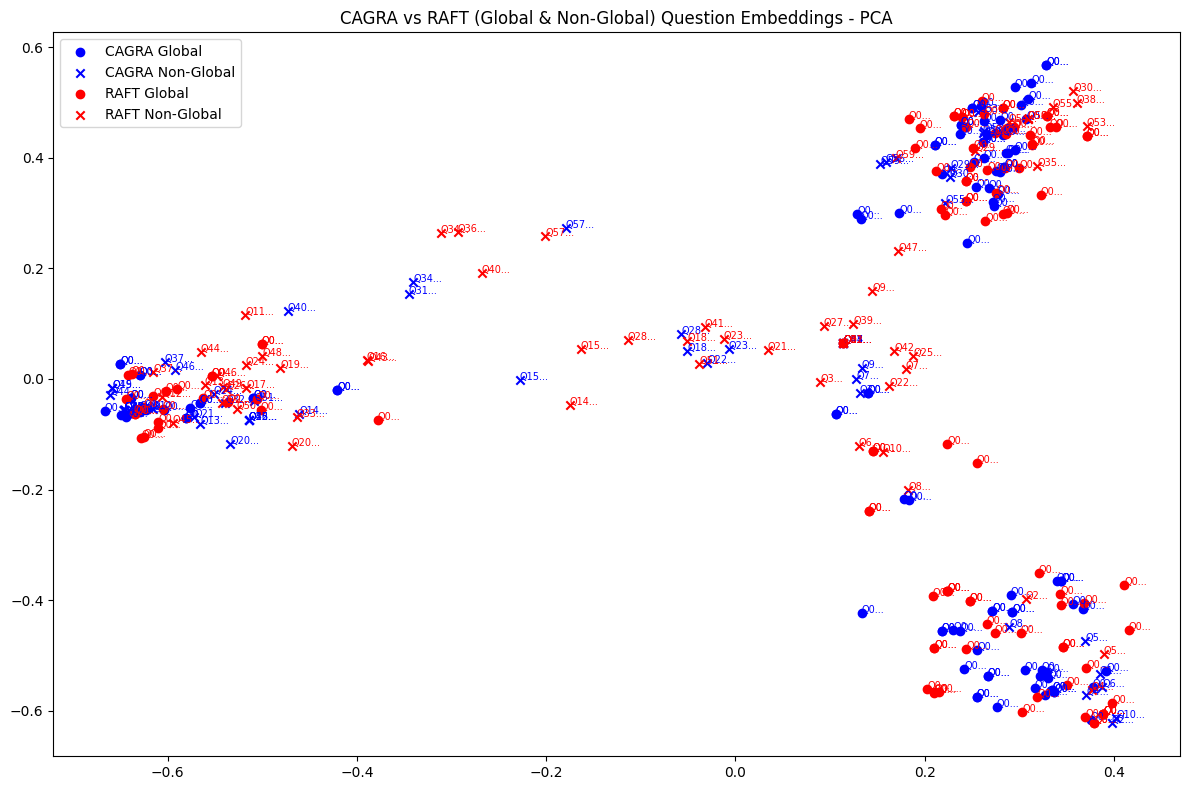

In [ ]:
plot_comparison_embeddings(cagra_embeddings_global, cagra_embeddings_nonglobal, raft_embeddings_global, raft_embeddings_nonglobal, method='pca')